In [2]:
train <- read.csv(file = '../../Data/training_data.csv')
library(keras)
dim(train)
train <- train[,-3]
X <- train[,-2]
X$Intensity <- as.numeric(X$Intensity)
X <- as.matrix(X)
Y <- train[,2]
dim(X)

[1]  708 4872

[1]  708 4870

`geom_smooth()` using formula 'y ~ x'


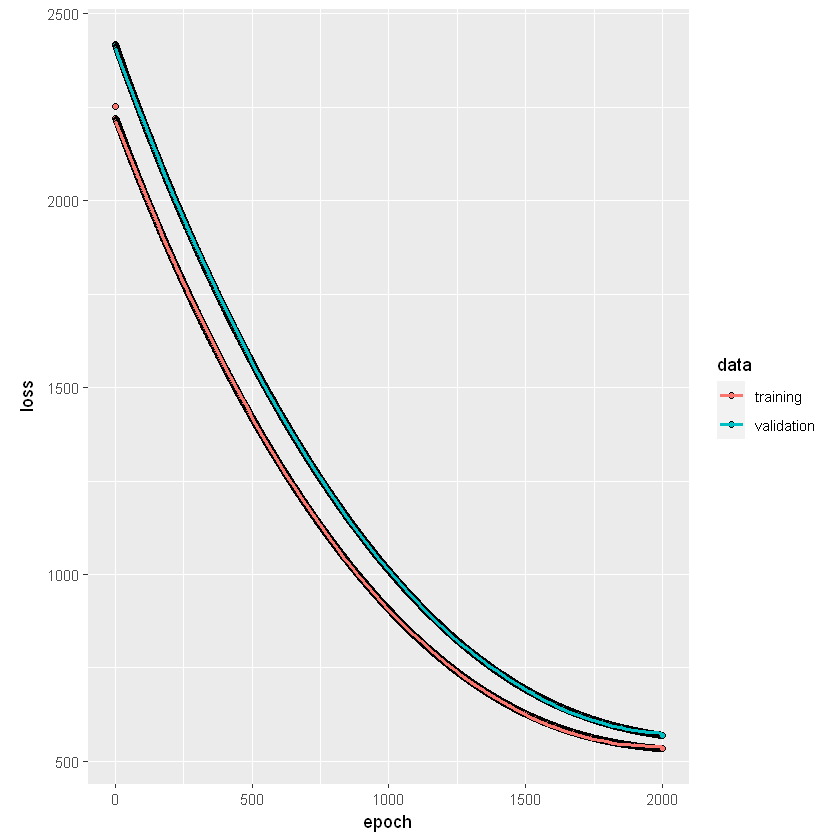

In [58]:
nn <- keras_model_sequential()

nn %>%
  layer_dense(units = 100, activation = 'relu', input_shape = 4870) %>%
  layer_dense(units = 10, activation = 'sigmoid') %>% layer_dense(units = 1,activation = 'linear')

nn %>% compile(
  loss = 'mse',
  optimizer = 'adam'
)

history <- nn %>% fit(
  (X), Y, 
  epochs = 2000,
  validation_split = 0.75,
  callbacks = callback_early_stopping(monitor = "val_loss")
)
plot(history)

`geom_smooth()` using formula 'y ~ x'


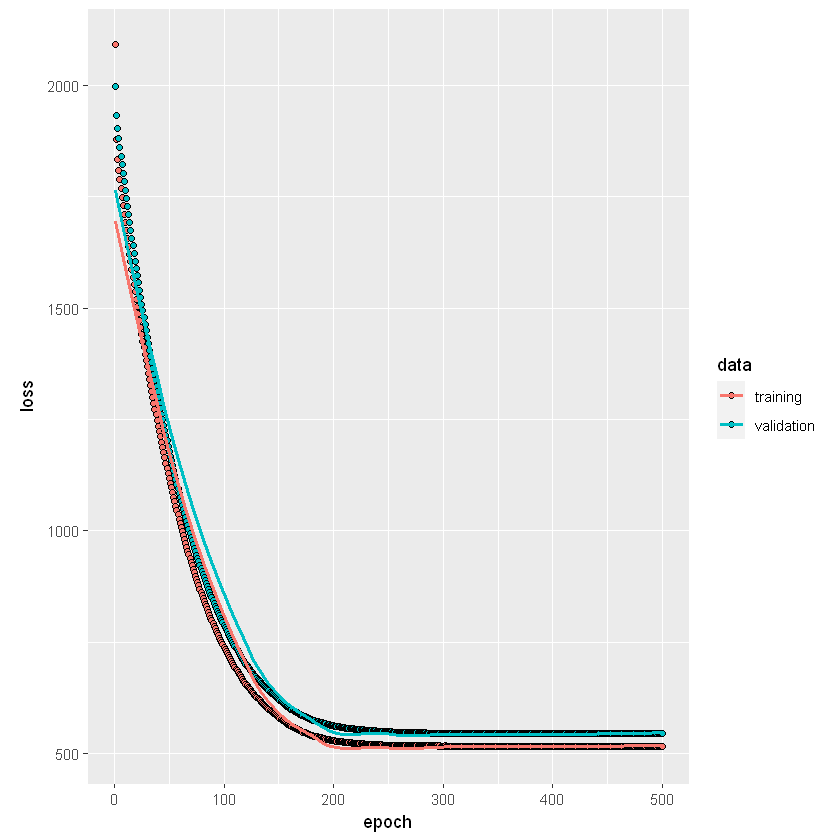

In [32]:
nn <- keras_model_sequential()
nn %>%
  layer_dense(units = 1000, activation = 'relu', input_shape = 4870) %>% layer_dense(units = 500, activation = 'tanh') %>%
  layer_dense(units = 100, activation = 'sigmoid') %>% layer_dense(units = 1,activation = 'linear')

nn %>% compile(
  loss = 'mse',
  optimizer = 'adam'
)

history <- nn %>% fit(
  (X), Y, 
  epochs = 200, 
  validation_split = 0.8
)
plot(history)


`geom_smooth()` using formula 'y ~ x'


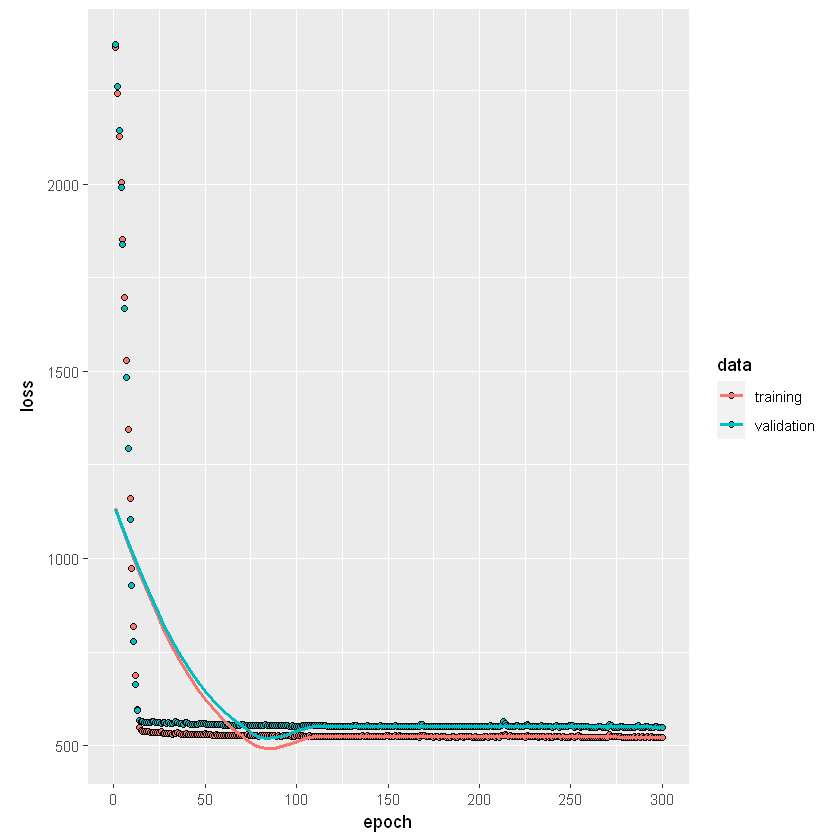

In [57]:
nn2 <- keras_model_sequential()
nn2 %>% layer_dense(units = 200, activation = 'relu', kernel_regularizer = regularizer_l2(l = .1), input_shape = 4870) %>% 
      layer_dense(units = 100, kernel_regularizer = regularizer_l2(l = .1), activation = 'sigmoid') %>%
      layer_dense(units = 50, kernel_regularizer = regularizer_l2(l = .1), activation = 'relu') %>%
      layer_dense(units = 50, kernel_regularizer = regularizer_l2(l = .1), activation = 'relu') %>% 
      layer_dense(units = 1, kernel_regularizer = regularizer_l2(l = .02), activation = 'linear')

                    
nn2 %>% compile(loss = 'mse', optimizer = 'adam')
                    

history <- nn2 %>% fit(
  (X), Y, 
  epochs = 300, 
  validation_split = 0.8
)
plot(history)

We can imagine that the data has a sort of organization but as there are 4k predictors, we will try to learn them.

## Convutionnal NN

In [3]:
X.conv <- as.matrix(X)
dim(X.conv)

[1]  708 4870

In [4]:
#reshape data
X.conv <- array_reshape(X.conv, c(nrow(X), 487, 10, 1)) #random shape


In [16]:
conv.nn <- keras_model_sequential()
conv.nn %>%
  layer_conv_2d(200,                         
                kernel_size = c(10, 5),     
                strides = c(2, 1),           
                activation = 'relu',
                input_shape = c(487, 10, 1)) %>%
  layer_conv_2d(100,                         
                kernel_size = c(4, 4),     
                strides = c(1, 1),           
                activation = 'relu') %>%
  layer_conv_2d(50,                         
                kernel_size = c(2, 1),     
                strides = c(1, 1),           
                activation = 'relu') %>%
  layer_flatten() %>%                        
  layer_dense(units = 400, activation = 'relu') %>%
  layer_dense(units = 1, activation = 'relu')

In [17]:
conv.nn %>% compile(
  loss = 'mse',
  optimizer = 'adam',
)


`geom_smooth()` using formula 'y ~ x'


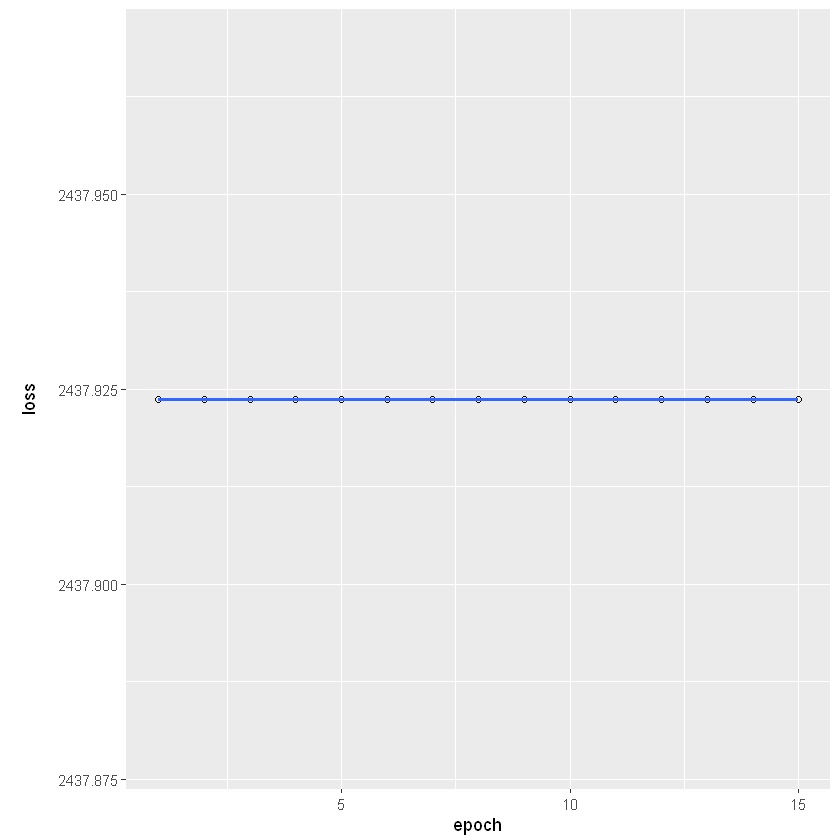

In [19]:
history <- conv.nn %>% fit(
  X.conv, Y,
  epochs = 15,
  #callbacks = callback_early_stopping(monitor = "val_loss")
)
plot(history)